In [1]:
#Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import seaborn as srn
from yellowbrick.classifier import ConfusionMatrix

In [2]:
#Importando a base de dados

base = pd.read_excel("stats.xlsx")
base.head()


,mandante,visitante,posse_casa,posse_fora,chutes_casa,chutes_fora,chutes_gol_casa,chutes_gol_fora,escanteios_casa,escanteios_fora,faltas_casa,faltas_fora,passes_casa,passes_fora,passes_certos_casa,passes_certos_fora,resultado
0,Wolves,Leeds,0.66,0.34,23,11,8,4,5,4,2,0,580,294,0.83,0.68,DERROTA
1,Brentford,Leicester,0.53,0.47,11,14,2,1,8,4,1,3,484,443,0.77,0.80,EMPATE
2,Southampton,Tottenham,0.50,0.50,19,17,7,3,10,3,2,1,457,450,0.85,0.84,EMPATE
3,Chelsea,Everton,0.69,0.31,20,12,7,3,8,2,2,1,542,246,0.84,0.67,EMPATE
4,Arsenal,Crystal Palace,0.62,0.38,15,9,5,5,5,4,2,2,587,358,0.87,0.78,VITORIA


ETAPA DE LIMPEZA E TRATAMENTO DOS DADOS (OS DADOS JÁ ESTÃO TODOS LIMPOS E TRATADOS, SÓ PASSANDO POR ESSA ETAPA
PARA NÃO PERDER O COSTUME)

In [3]:
#Etapa da limpeza e tratamento dos dados
#Verificando se há colunas com dados em branco
base.isnull().sum()

mandante              0
visitante             0
posse_casa            0
posse_fora            0
chutes_casa           0
chutes_fora           0
chutes_gol_casa       0
chutes_gol_fora       0
escanteios_casa       0
escanteios_fora       0
faltas_casa           0
faltas_fora           0
passes_casa           0
passes_fora           0
passes_certos_casa    0
passes_certos_fora    0
resultado             0
dtype: int64

In [ ]:
#Explorando alguns dados categóricos para ver senão há dados de um mesmo time muitas vezes
#Time mandante
agrupado = base.groupby(["mandante"]).size()
agrupado

In [ ]:
#Time visitante

agrupado = base.groupby(["visitante"]).size()
agrupado

In [ ]:
#Explorando colunas numéricas

base["posse_casa"].describe()

In [ ]:
srn.boxplot(base["posse_casa"]).set_title("Posse Casa")

In [ ]:
base["posse_fora"].describe()

In [ ]:
srn.boxplot(base["posse_fora"]).set_title("Posse Fora")

In [ ]:
base["passes_casa"].describe()

In [ ]:
srn.boxplot(base["passes_casa"]).set_title("Passes Casa")

In [ ]:
base["passes_fora"].describe()

In [ ]:
srn.boxplot(base["passes_fora"]).set_title("Passes Fora")

In [ ]:
base["chutes_casa"].describe()

In [ ]:
srn.boxplot(base["chutes_casa"]).set_title("Chutes Casa")

In [ ]:
base["chutes_fora"].describe()

In [ ]:
srn.boxplot(base["chutes_fora"]).set_title("Chutes Fora")

In [ ]:
base["passes_certos_casa"].describe()

In [ ]:
srn.boxplot(base["passes_certos_casa"]).set_title("Passes Certos Casa")

In [ ]:
base["passes_certos_fora"].describe()

In [ ]:
srn.boxplot(base["passes_certos_fora"]).set_title("Passes Certos Fora")

COMEÇANDO A CONTRUÇÃO DO MODELO

In [10]:
#Separando os previsores e a classe

previsores = base.iloc[:, 0:16].values
classe =  base.iloc[:, 16].values
previsores

array([['Wolves', 'Leeds', 0.66, ..., 294, 0.83, 0.68],
       ['Brentford', 'Leicester', 0.53, ..., 443, 0.77, 0.8],
       ['Southampton', 'Tottenham', 0.5, ..., 450, 0.85, 0.84],
       ...,
       ['Man. United', 'Brighton', 0.63, ..., 326, 0.82, 0.7],
       ['West Ham', 'Man. City', 0.25, ..., 833, 0.78, 0.93],
       ['Aston Villa', 'Everton', 0.58, ..., 378, 0.84, 0.77]],
      dtype=object)

In [14]:
#Fazendo a tranformação das colunas de texto em codigos para serem usadas no modelo
labelencoder1 = LabelEncoder()
previsores[:, 0] = labelencoder1.fit_transform(previsores[:, 0])

labelencoder2 = LabelEncoder()
previsores[:, 1] = labelencoder2.fit_transform(previsores[:, 1])
previsores

array([[19, 10, 0.66, ..., 294, 0.83, 0.68],
       [3, 11, 0.53, ..., 443, 0.77, 0.8],
       [16, 17, 0.5, ..., 450, 0.85, 0.84],
       ...,
       [14, 4, 0.63, ..., 326, 0.82, 0.7],
       [18, 13, 0.25, ..., 833, 0.78, 0.93],
       [1, 7, 0.58, ..., 378, 0.84, 0.77]], dtype=object)

In [15]:
#Separando os dados de treino e teste

x_treino, x_teste, y_treino, y_teste = train_test_split(previsores,
                                                        classe,
                                                        test_size=0.3,
                                                        random_state=0)

In [16]:
#O primeiro modelo a ser feito é o Naive Bayes

naive_bayes = GaussianNB()
naive_bayes.fit(x_treino, y_treino) 

GaussianNB()

In [17]:
previsoes_nv = naive_bayes.predict(x_teste)
previsoes_nv

array(['VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'EMPATE',
       'VITORIA', 'DERROTA', 'VITORIA', 'DERROTA', 'EMPATE', 'EMPATE',
       'DERROTA', 'VITORIA', 'VITORIA', 'VITORIA', 'EMPATE', 'EMPATE',
       'VITORIA', 'EMPATE', 'DERROTA', 'DERROTA', 'VITORIA', 'VITORIA',
       'VITORIA', 'EMPATE', 'DERROTA', 'EMPATE', 'DERROTA', 'DERROTA',
       'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'EMPATE', 'VITORIA',
       'EMPATE', 'DERROTA', 'VITORIA', 'DERROTA', 'VITORIA', 'VITORIA',
       'VITORIA', 'VITORIA', 'EMPATE', 'EMPATE', 'EMPATE', 'DERROTA',
       'EMPATE', 'VITORIA', 'VITORIA', 'VITORIA', 'EMPATE', 'VITORIA',
       'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA',
       'EMPATE', 'VITORIA', 'DERROTA', 'EMPATE', 'DERROTA', 'EMPATE',
       'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA',
       'EMPATE', 'EMPATE', 'EMPATE', 'VITORIA', 'VITORIA', 'DERROTA',
       'VITORIA', 'DERROTA', 'DERROTA'], dtype='<U7')

In [18]:
#Matrix de confusão

matrix_nv = confusion_matrix(y_teste, previsoes_nv)
matrix_nv

array([[ 9,  7, 10],
       [ 3,  5, 13],
       [ 4,  9, 21]], dtype=int64)

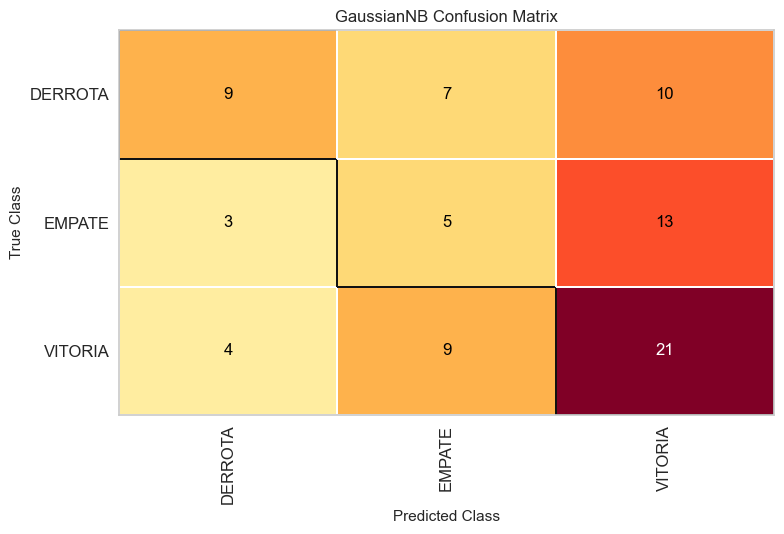

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [19]:
v = ConfusionMatrix(GaussianNB())
v.fit(x_treino, y_treino)
v.score(x_teste, y_teste)
v.poof()

In [20]:
#Taxa de acerto

taxa_acerto_nv = accuracy_score(y_teste, previsoes_nv)
taxa_erro_nv = 1 - taxa_acerto_nv
taxa_acerto_nv

0.43209876543209874

In [35]:
#Agora utilizarei a árvore de decisão

arvore = DecisionTreeClassifier()
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [36]:
previsoes_ar = arvore.predict(x_teste)
previsoes_ar

array(['VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'EMPATE', 'VITORIA',
       'VITORIA', 'DERROTA', 'DERROTA', 'DERROTA', 'DERROTA', 'DERROTA',
       'DERROTA', 'DERROTA', 'VITORIA', 'EMPATE', 'DERROTA', 'DERROTA',
       'DERROTA', 'DERROTA', 'EMPATE', 'VITORIA', 'EMPATE', 'VITORIA',
       'VITORIA', 'DERROTA', 'VITORIA', 'VITORIA', 'DERROTA', 'EMPATE',
       'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'DERROTA', 'EMPATE',
       'VITORIA', 'EMPATE', 'DERROTA', 'DERROTA', 'VITORIA', 'DERROTA',
       'EMPATE', 'VITORIA', 'EMPATE', 'DERROTA', 'VITORIA', 'DERROTA',
       'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'EMPATE', 'VITORIA',
       'VITORIA', 'EMPATE', 'VITORIA', 'EMPATE', 'VITORIA', 'VITORIA',
       'VITORIA', 'DERROTA', 'DERROTA', 'EMPATE', 'DERROTA', 'VITORIA',
       'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'EMPATE', 'EMPATE',
       'EMPATE', 'EMPATE', 'EMPATE', 'VITORIA', 'VITORIA', 'VITORIA',
       'VITORIA', 'EMPATE', 'EMPATE'], dtype=object)

In [37]:
#Matrix de confusão

matrix_ar = confusion_matrix(y_teste, previsoes_nv)
matrix_ar

array([[ 9,  7, 10],
       [ 3,  5, 13],
       [ 4,  9, 21]], dtype=int64)

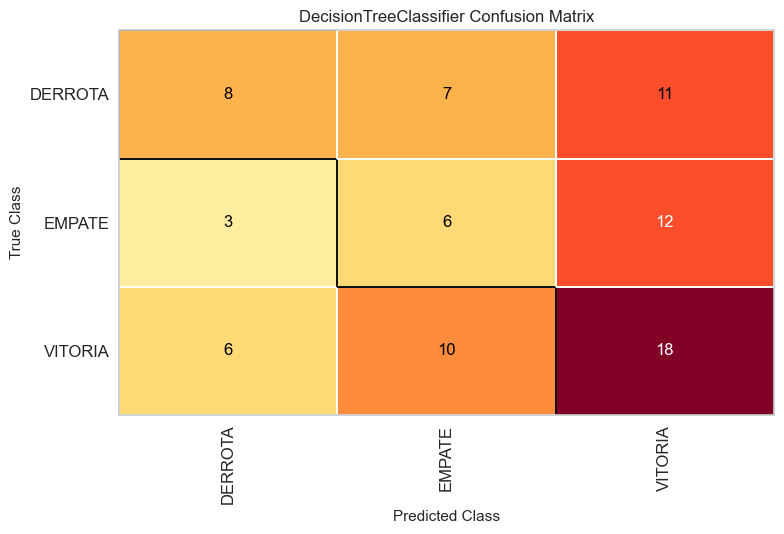

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(x_treino, y_treino)
v.score(x_teste, y_teste)
v.poof()

In [39]:
taxa_acerto_ar = accuracy_score(y_teste, previsoes_ar)
taxa_acerto_ar

0.35802469135802467

In [70]:
#Usando o KNeighbors

modelo_kn = KNeighborsClassifier(n_neighbors=4)
modelo_kn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=4)

In [71]:
previsoes_kn = modelo_kn.predict(x_teste)
previsoes_kn

array(['VITORIA', 'DERROTA', 'DERROTA', 'DERROTA', 'DERROTA', 'EMPATE',
       'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA',
       'VITORIA', 'DERROTA', 'VITORIA', 'DERROTA', 'VITORIA', 'DERROTA',
       'DERROTA', 'VITORIA', 'DERROTA', 'DERROTA', 'EMPATE', 'DERROTA',
       'VITORIA', 'DERROTA', 'DERROTA', 'VITORIA', 'DERROTA', 'DERROTA',
       'VITORIA', 'VITORIA', 'DERROTA', 'VITORIA', 'VITORIA', 'VITORIA',
       'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'DERROTA', 'VITORIA',
       'EMPATE', 'EMPATE', 'VITORIA', 'EMPATE', 'VITORIA', 'VITORIA',
       'DERROTA', 'DERROTA', 'EMPATE', 'DERROTA', 'DERROTA', 'VITORIA',
       'VITORIA', 'VITORIA', 'VITORIA', 'EMPATE', 'VITORIA', 'VITORIA',
       'EMPATE', 'VITORIA', 'DERROTA', 'VITORIA', 'DERROTA', 'VITORIA',
       'VITORIA', 'DERROTA', 'DERROTA', 'DERROTA', 'EMPATE', 'VITORIA',
       'DERROTA', 'DERROTA', 'EMPATE', 'VITORIA', 'EMPATE', 'VITORIA',
       'VITORIA', 'DERROTA', 'VITORIA'], dtype=object)

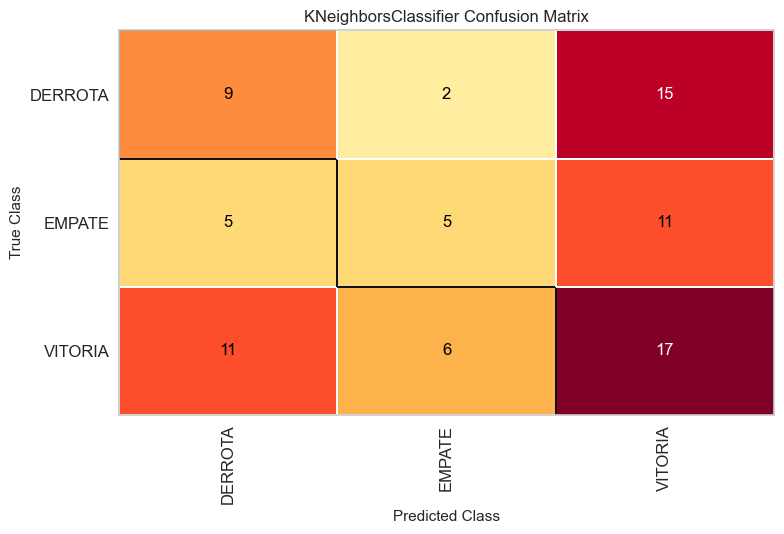

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [72]:
#Matrix de confusão

v = ConfusionMatrix(KNeighborsClassifier())
v.fit(x_treino, y_treino)
v.score(x_teste, y_teste)
v.poof()

In [73]:
taxa_acerto_kn = accuracy_score(y_teste, previsoes_kn)
taxa_acerto_kn

0.38271604938271603

In [130]:
#Usando a floresta aleatória / RandomForest

modelo_rf = RandomForestClassifier(n_estimators=300)
modelo_rf.fit(x_treino, y_treino)

RandomForestClassifier(n_estimators=300)

In [131]:
#Visualização dos atributos principais

modelo_rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1522693653),
 DecisionTreeClassifier(max_features='sqrt', random_state=765469655),
 DecisionTreeClassifier(max_features='sqrt', random_state=1646373661),
 DecisionTreeClassifier(max_features='sqrt', random_state=986104312),
 DecisionTreeClassifier(max_features='sqrt', random_state=2137482557),
 DecisionTreeClassifier(max_features='sqrt', random_state=147062921),
 DecisionTreeClassifier(max_features='sqrt', random_state=498430206),
 DecisionTreeClassifier(max_features='sqrt', random_state=1071138525),
 DecisionTreeClassifier(max_features='sqrt', random_state=1181187558),
 DecisionTreeClassifier(max_features='sqrt', random_state=997761064),
 DecisionTreeClassifier(max_features='sqrt', random_state=605798135),
 DecisionTreeClassifier(max_features='sqrt', random_state=774927891),
 DecisionTreeClassifier(max_features='sqrt', random_state=1618844280),
 DecisionTreeClassifier(max_features='sqrt', random_state=461668627),
 DecisionTreeC

In [132]:
previsoes_rf = modelo_rf.predict(x_teste)
previsoes_rf

array(['VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'EMPATE', 'VITORIA',
       'VITORIA', 'VITORIA', 'VITORIA', 'DERROTA', 'DERROTA', 'VITORIA',
       'DERROTA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'DERROTA',
       'DERROTA', 'VITORIA', 'DERROTA', 'DERROTA', 'VITORIA', 'VITORIA',
       'VITORIA', 'VITORIA', 'DERROTA', 'VITORIA', 'DERROTA', 'VITORIA',
       'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA',
       'VITORIA', 'EMPATE', 'VITORIA', 'DERROTA', 'VITORIA', 'VITORIA',
       'DERROTA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA',
       'EMPATE', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA',
       'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA',
       'VITORIA', 'DERROTA', 'DERROTA', 'VITORIA', 'DERROTA', 'EMPATE',
       'VITORIA', 'VITORIA', 'VITORIA', 'VITORIA', 'EMPATE', 'VITORIA',
       'EMPATE', 'EMPATE', 'VITORIA', 'VITORIA', 'VITORIA', 'EMPATE',
       'VITORIA', 'VITORIA', 'EMPATE'], dtype=object)

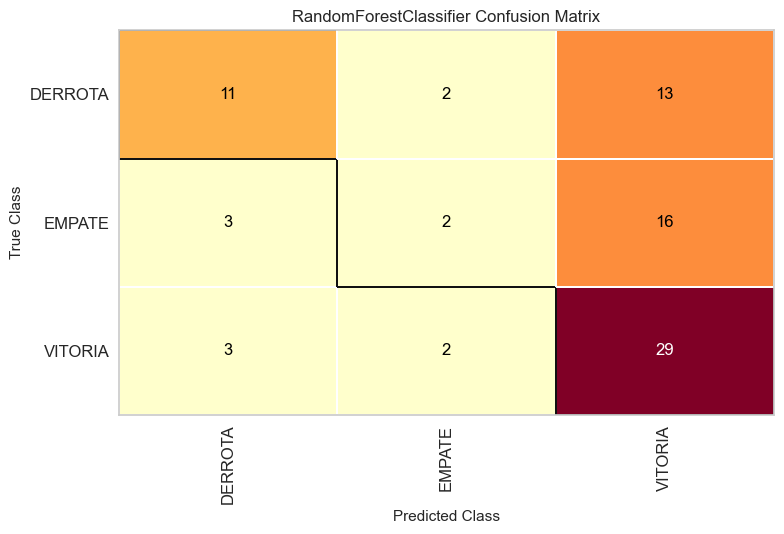

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [133]:
#Matrix de confusão

v = ConfusionMatrix(RandomForestClassifier())
v.fit(x_treino, y_treino)
v.score(x_teste, y_teste)
v.poof()

In [134]:
taxa_acerto_rf = accuracy_score(y_teste, previsoes_rf)
taxa_acerto_rf

0.5185185185185185